In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 

# Loading the Iris Flower Dataset

In [88]:
df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

In [89]:
# Preprocess specie names: 
d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species'] = df['species'].map(d)
#remove specie from the dataset: 
species = df['species']
data = df.drop('species', axis = 1)

# Explore the Dataset

In [90]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## The dataset consists of 4 properties: Sepal length, sepal width, petal length and petal width. We draw Scatter plots between the 4 to check for covariance. 

Text(0.5, 1.0, 'petal_length vs petal_width')

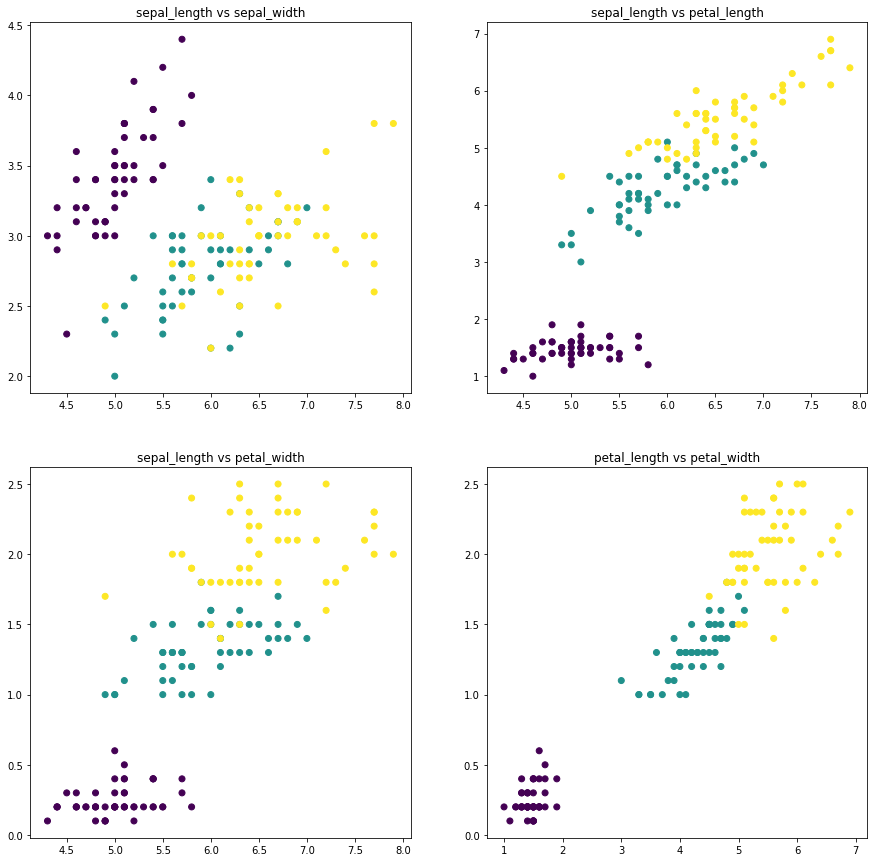

In [91]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0, 0].scatter(df['sepal_length'], df['sepal_width'], c = species)
axs[0, 0].set_title('sepal_length vs sepal_width')

axs[0, 1].scatter(df['sepal_length'], df['petal_length'], c = species)
axs[0, 1].set_title('sepal_length vs petal_length')

axs[1, 0].scatter(df['sepal_length'], df['petal_width'], c = species)
axs[1, 0].set_title('sepal_length vs petal_width')

axs[1, 1].scatter(df['petal_length'], df['petal_width'], c = species)
axs[1, 1].set_title('petal_length vs petal_width')

## As we can observe, taking any two features will result in overlapping of classes, which is not good for clustering algorithms.

# We now create a PCA model and fit the dataset to it 

In [92]:
model = PCA()
model.fit(data)

PCA()

<BarContainer object of 4 artists>

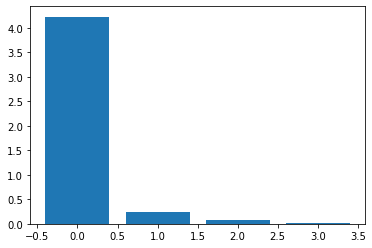

In [93]:
plt.bar(range(model.n_components_), model.explained_variance_)

## The bar plot shows that the data has intrisically 2 dimensions, as the variance approaches zero as dim equals 3. So we can approximate the data set using PC1 and PC2 only. 

Text(0.5, 1.0, 'PC1 and PC2 components scatter plot')

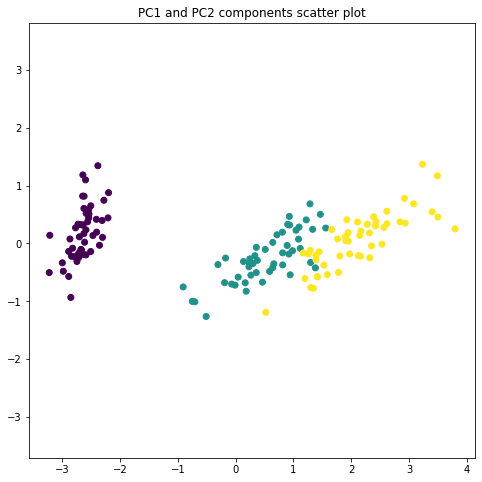

In [94]:
# Transform the data: 
transformed = model.transform(data)

#take out the first two PC components: 
pca1 = transformed[:, 0]
pca2 = transformed[:, 1]
plt.figure(figsize = (8,8))
plt.scatter(pca1, pca2, c = species)
plt.axis('equal')
plt.title('PC1 and PC2 components scatter plot')

## As can be observed, the PCA has relatively seperated data into 3 classes with approx. no overlap with only two components